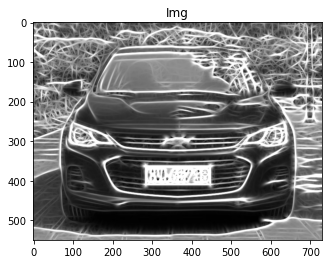

In [25]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math
 
def build_filters():
 filters = []
 ksize = 31
 for theta in np.arange(0, np.pi, np.pi / 16):
     kern = cv2.getGaborKernel((ksize, ksize), 4.0, theta, 10.0, 0.5, 0, ktype=cv2.CV_32F)
     kern /= 1.5*kern.sum()
     filters.append(kern)
 return filters
 
def process(img, filters):
 accum = np.zeros_like(img)
 for kern in filters:
     fimg = cv2.filter2D(img, cv2.CV_8UC3, kern)
     np.maximum(accum, fimg, accum)
 return accum
 
image = cv2.imread('test04.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
img = cv2.blur(gray,(1,1))

    
filters = build_filters()
 
res1 = process(img, filters)
plt.title("Img") 
plt.imshow(cv2.cvtColor(res1 , cv2.COLOR_BGR2RGB))
 

In [26]:
#cv2.imshow('result', res1)
cv2.waitKey(0)
cv2.destroyAllWindows()

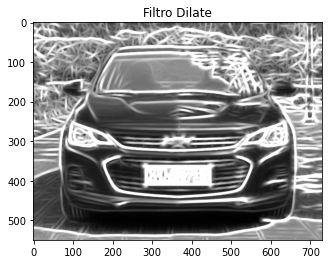

In [27]:
canny = cv2.dilate(res1,None,iterations=1)
plt.title("Filtro Dilate") 
plt.imshow(cv2.cvtColor(canny , cv2.COLOR_BGR2RGB))